In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.lines import Line2D  # for legend handle


import geopandas as gpd


pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

In [3]:
CanadaEmissions_df = pd.read_csv('CO2 emissions/EN_GHG_IPCC_Can_Prov_Terr.csv', low_memory=False)#.set_index('Parameter')
CanadaEmissions_df

,Year,Region,CategoryID,Source,Category,Sub-category,Sub-sub-category,Total,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),HFCs,PFCs,SF6,NF3,CO2eq,Unit
0,1990,Prince Edward Island,144,Energy,Stationary Combustion Sources,Manufacturing Industries,Pulp and Paper,NaN,0,0,0,0,0,0,0,0,0,0,kt
1,1990,Prince Edward Island,145,Energy,Stationary Combustion Sources,Manufacturing Industries,Cement,NaN,0,0,0,0,0,0,0,0,0,0,kt
2,1990,Prince Edward Island,146,Energy,Stationary Combustion Sources,Manufacturing Industries,Other Manufacturing,NaN,54.80202333,0.00171763,0.042940757,0.001276424,0.380374275,0,0,0,0,55.22533836,kt
3,1990,Prince Edward Island,150,Energy,Stationary Combustion Sources,Construction,NaN,NaN,11.0527304,0.000115086,0.00287715,0.000224541,0.066913218,0,0,0,0,11.12252077,kt
4,1990,Prince Edward Island,160,Energy,Stationary Combustion Sources,Commercial and Institutional,NaN,NaN,198.9997486,0.037393399,0.934834963,0.007838148,2.335768164,0,0,0,0,202.2703517,kt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39066,2021,Nunavut,720,"Land Use, Land-Use Change and Forestry",Cropland,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt
39067,2021,Nunavut,730,"Land Use, Land-Use Change and Forestry",Grassland,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt
39068,2021,Nunavut,740,"Land Use, Land-Use Change and Forestry",Wetlands,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt
39069,2021,Nunavut,750,"Land Use, Land-Use Change and Forestry",Settlements,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt


## Data conditioning

In [4]:
condtion_year = CanadaEmissions_df['Year'] == 2021

CanadaEmissions_df_subset = CanadaEmissions_df[condtion_year]

In [5]:
CanadaEmissions_df_subset['Sum of CO2eqs'] = CanadaEmissions_df_subset['CO2'] + CanadaEmissions_df_subset['CH4 (CO2eq)']+ CanadaEmissions_df_subset['N2O (CO2eq)']
CanadaEmissions_df_subset

,Year,Region,CategoryID,Source,Category,Sub-category,Sub-sub-category,Total,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),HFCs,PFCs,SF6,NF3,CO2eq,Unit,Sum of CO2eqs
5956,2021,Canada,110,Energy,Stationary Combustion Sources,Public Electricity and Heat Production,NaN,NaN,59857.84944,7.778580064,194.4645016,1.320853288,393.6142799,0,0,0,0,60445.92822,kt,59857.84944194.4645016393.6142799
5957,2021,Canada,120,Energy,Stationary Combustion Sources,Petroleum Refining Industries,NaN,NaN,13123.17548,0.287109113,7.177727828,0.094518429,28.16649178,0,0,0,0,13158.5197,kt,13123.175487.17772782828.16649178
5958,2021,Canada,130,Energy,Stationary Combustion Sources,Oil and Gas Extraction,NaN,NaN,100379.8601,86.95039521,2173.75988,1.952528116,581.8533785,0,0,0,0,103135.4734,kt,100379.86012173.75988581.8533785
5959,2021,Canada,131,Energy,Stationary Combustion Sources,Mining,NaN,NaN,6372.609247,0.134309594,3.357739842,0.124422882,37.07801894,0,0,0,0,6413.045006,kt,6372.6092473.35773984237.07801894
5960,2021,Canada,141,Energy,Stationary Combustion Sources,Manufacturing Industries,Iron and Steel,NaN,5133.521657,0.117297056,2.932426401,0.105347202,31.39346632,0,0,0,0,5167.847549,kt,5133.5216572.93242640131.39346632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39066,2021,Nunavut,720,"Land Use, Land-Use Change and Forestry",Cropland,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt,000
39067,2021,Nunavut,730,"Land Use, Land-Use Change and Forestry",Grassland,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt,000
39068,2021,Nunavut,740,"Land Use, Land-Use Change and Forestry",Wetlands,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt,000
39069,2021,Nunavut,750,"Land Use, Land-Use Change and Forestry",Settlements,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt,000


In [6]:
CanadaEmissions_df_subset['CO2'] = CanadaEmissions_df_subset['CO2'].replace(to_replace='x', value=0,)
CanadaEmissions_df_subset

,Year,Region,CategoryID,Source,Category,Sub-category,Sub-sub-category,Total,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),HFCs,PFCs,SF6,NF3,CO2eq,Unit,Sum of CO2eqs
5956,2021,Canada,110,Energy,Stationary Combustion Sources,Public Electricity and Heat Production,NaN,NaN,59857.84944,7.778580064,194.4645016,1.320853288,393.6142799,0,0,0,0,60445.92822,kt,59857.84944194.4645016393.6142799
5957,2021,Canada,120,Energy,Stationary Combustion Sources,Petroleum Refining Industries,NaN,NaN,13123.17548,0.287109113,7.177727828,0.094518429,28.16649178,0,0,0,0,13158.5197,kt,13123.175487.17772782828.16649178
5958,2021,Canada,130,Energy,Stationary Combustion Sources,Oil and Gas Extraction,NaN,NaN,100379.8601,86.95039521,2173.75988,1.952528116,581.8533785,0,0,0,0,103135.4734,kt,100379.86012173.75988581.8533785
5959,2021,Canada,131,Energy,Stationary Combustion Sources,Mining,NaN,NaN,6372.609247,0.134309594,3.357739842,0.124422882,37.07801894,0,0,0,0,6413.045006,kt,6372.6092473.35773984237.07801894
5960,2021,Canada,141,Energy,Stationary Combustion Sources,Manufacturing Industries,Iron and Steel,NaN,5133.521657,0.117297056,2.932426401,0.105347202,31.39346632,0,0,0,0,5167.847549,kt,5133.5216572.93242640131.39346632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39066,2021,Nunavut,720,"Land Use, Land-Use Change and Forestry",Cropland,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt,000
39067,2021,Nunavut,730,"Land Use, Land-Use Change and Forestry",Grassland,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt,000
39068,2021,Nunavut,740,"Land Use, Land-Use Change and Forestry",Wetlands,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt,000
39069,2021,Nunavut,750,"Land Use, Land-Use Change and Forestry",Settlements,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt,000


In [7]:
CanadaEmissions_df_subset[['CO2', 'CH4', 'CH4 (CO2eq)', 'N2O','N2O (CO2eq)', 'HFCs', 'PFCs', 'SF6', 'NF3', 'CO2eq']] = CanadaEmissions_df_subset[['CO2', 'CH4', 'CH4 (CO2eq)', 'N2O','N2O (CO2eq)', 'HFCs', 'PFCs', 'SF6', 'NF3', 'CO2eq']].replace(to_replace='x', value=0,)
CanadaEmissions_df_subset

,Year,Region,CategoryID,Source,Category,Sub-category,Sub-sub-category,Total,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),HFCs,PFCs,SF6,NF3,CO2eq,Unit,Sum of CO2eqs
5956,2021,Canada,110,Energy,Stationary Combustion Sources,Public Electricity and Heat Production,NaN,NaN,59857.84944,7.778580064,194.4645016,1.320853288,393.6142799,0,0,0,0,60445.92822,kt,59857.84944194.4645016393.6142799
5957,2021,Canada,120,Energy,Stationary Combustion Sources,Petroleum Refining Industries,NaN,NaN,13123.17548,0.287109113,7.177727828,0.094518429,28.16649178,0,0,0,0,13158.5197,kt,13123.175487.17772782828.16649178
5958,2021,Canada,130,Energy,Stationary Combustion Sources,Oil and Gas Extraction,NaN,NaN,100379.8601,86.95039521,2173.75988,1.952528116,581.8533785,0,0,0,0,103135.4734,kt,100379.86012173.75988581.8533785
5959,2021,Canada,131,Energy,Stationary Combustion Sources,Mining,NaN,NaN,6372.609247,0.134309594,3.357739842,0.124422882,37.07801894,0,0,0,0,6413.045006,kt,6372.6092473.35773984237.07801894
5960,2021,Canada,141,Energy,Stationary Combustion Sources,Manufacturing Industries,Iron and Steel,NaN,5133.521657,0.117297056,2.932426401,0.105347202,31.39346632,0,0,0,0,5167.847549,kt,5133.5216572.93242640131.39346632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39066,2021,Nunavut,720,"Land Use, Land-Use Change and Forestry",Cropland,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt,000
39067,2021,Nunavut,730,"Land Use, Land-Use Change and Forestry",Grassland,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt,000
39068,2021,Nunavut,740,"Land Use, Land-Use Change and Forestry",Wetlands,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt,000
39069,2021,Nunavut,750,"Land Use, Land-Use Change and Forestry",Settlements,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,kt,000


In [8]:
CanadaEmissions_df_subset[['CO2', 'CH4', 'CH4 (CO2eq)', 'N2O','N2O (CO2eq)', 'HFCs', 'PFCs', 'SF6', 'NF3', 'CO2eq']] = CanadaEmissions_df_subset[['CO2', 'CH4', 'CH4 (CO2eq)', 'N2O','N2O (CO2eq)', 'HFCs', 'PFCs', 'SF6', 'NF3', 'CO2eq']].astype(float)
CanadaEmissions_df_subset

,Year,Region,CategoryID,Source,Category,Sub-category,Sub-sub-category,Total,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),HFCs,PFCs,SF6,NF3,CO2eq,Unit,Sum of CO2eqs
5956,2021,Canada,110,Energy,Stationary Combustion Sources,Public Electricity and Heat Production,NaN,NaN,59857.849440,7.778580,194.464502,1.320853,393.614280,0.0,0.0,0.0,0.0,60445.928220,kt,59857.84944194.4645016393.6142799
5957,2021,Canada,120,Energy,Stationary Combustion Sources,Petroleum Refining Industries,NaN,NaN,13123.175480,0.287109,7.177728,0.094518,28.166492,0.0,0.0,0.0,0.0,13158.519700,kt,13123.175487.17772782828.16649178
5958,2021,Canada,130,Energy,Stationary Combustion Sources,Oil and Gas Extraction,NaN,NaN,100379.860100,86.950395,2173.759880,1.952528,581.853378,0.0,0.0,0.0,0.0,103135.473400,kt,100379.86012173.75988581.8533785
5959,2021,Canada,131,Energy,Stationary Combustion Sources,Mining,NaN,NaN,6372.609247,0.134310,3.357740,0.124423,37.078019,0.0,0.0,0.0,0.0,6413.045006,kt,6372.6092473.35773984237.07801894
5960,2021,Canada,141,Energy,Stationary Combustion Sources,Manufacturing Industries,Iron and Steel,NaN,5133.521657,0.117297,2.932426,0.105347,31.393466,0.0,0.0,0.0,0.0,5167.847549,kt,5133.5216572.93242640131.39346632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39066,2021,Nunavut,720,"Land Use, Land-Use Change and Forestry",Cropland,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,kt,000
39067,2021,Nunavut,730,"Land Use, Land-Use Change and Forestry",Grassland,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,kt,000
39068,2021,Nunavut,740,"Land Use, Land-Use Change and Forestry",Wetlands,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,kt,000
39069,2021,Nunavut,750,"Land Use, Land-Use Change and Forestry",Settlements,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,kt,000


In [9]:
CanadaEmissions_df_subset['Sum of CO2eqs'] = CanadaEmissions_df_subset['CO2'] + CanadaEmissions_df_subset['CH4 (CO2eq)']+ CanadaEmissions_df_subset['N2O (CO2eq)']
CanadaEmissions_df_subset

,Year,Region,CategoryID,Source,Category,Sub-category,Sub-sub-category,Total,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),HFCs,PFCs,SF6,NF3,CO2eq,Unit,Sum of CO2eqs
5956,2021,Canada,110,Energy,Stationary Combustion Sources,Public Electricity and Heat Production,NaN,NaN,59857.849440,7.778580,194.464502,1.320853,393.614280,0.0,0.0,0.0,0.0,60445.928220,kt,60445.928221
5957,2021,Canada,120,Energy,Stationary Combustion Sources,Petroleum Refining Industries,NaN,NaN,13123.175480,0.287109,7.177728,0.094518,28.166492,0.0,0.0,0.0,0.0,13158.519700,kt,13158.519700
5958,2021,Canada,130,Energy,Stationary Combustion Sources,Oil and Gas Extraction,NaN,NaN,100379.860100,86.950395,2173.759880,1.952528,581.853378,0.0,0.0,0.0,0.0,103135.473400,kt,103135.473359
5959,2021,Canada,131,Energy,Stationary Combustion Sources,Mining,NaN,NaN,6372.609247,0.134310,3.357740,0.124423,37.078019,0.0,0.0,0.0,0.0,6413.045006,kt,6413.045006
5960,2021,Canada,141,Energy,Stationary Combustion Sources,Manufacturing Industries,Iron and Steel,NaN,5133.521657,0.117297,2.932426,0.105347,31.393466,0.0,0.0,0.0,0.0,5167.847549,kt,5167.847550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39066,2021,Nunavut,720,"Land Use, Land-Use Change and Forestry",Cropland,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,kt,0.000000
39067,2021,Nunavut,730,"Land Use, Land-Use Change and Forestry",Grassland,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,kt,0.000000
39068,2021,Nunavut,740,"Land Use, Land-Use Change and Forestry",Wetlands,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,kt,0.000000
39069,2021,Nunavut,750,"Land Use, Land-Use Change and Forestry",Settlements,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,kt,0.000000


In [10]:
CanadaEmissions_df_subset['Sum of CO2eqs 2'] = CanadaEmissions_df_subset[['CO2','CH4 (CO2eq)','N2O (CO2eq)']].sum(axis=1)
CanadaEmissions_df_subset

,Year,Region,CategoryID,Source,Category,Sub-category,Sub-sub-category,Total,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),HFCs,PFCs,SF6,NF3,CO2eq,Unit,Sum of CO2eqs,Sum of CO2eqs 2
5956,2021,Canada,110,Energy,Stationary Combustion Sources,Public Electricity and Heat Production,NaN,NaN,59857.849440,7.778580,194.464502,1.320853,393.614280,0.0,0.0,0.0,0.0,60445.928220,kt,60445.928221,60445.928221
5957,2021,Canada,120,Energy,Stationary Combustion Sources,Petroleum Refining Industries,NaN,NaN,13123.175480,0.287109,7.177728,0.094518,28.166492,0.0,0.0,0.0,0.0,13158.519700,kt,13158.519700,13158.519700
5958,2021,Canada,130,Energy,Stationary Combustion Sources,Oil and Gas Extraction,NaN,NaN,100379.860100,86.950395,2173.759880,1.952528,581.853378,0.0,0.0,0.0,0.0,103135.473400,kt,103135.473359,103135.473359
5959,2021,Canada,131,Energy,Stationary Combustion Sources,Mining,NaN,NaN,6372.609247,0.134310,3.357740,0.124423,37.078019,0.0,0.0,0.0,0.0,6413.045006,kt,6413.045006,6413.045006
5960,2021,Canada,141,Energy,Stationary Combustion Sources,Manufacturing Industries,Iron and Steel,NaN,5133.521657,0.117297,2.932426,0.105347,31.393466,0.0,0.0,0.0,0.0,5167.847549,kt,5167.847550,5167.847550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39066,2021,Nunavut,720,"Land Use, Land-Use Change and Forestry",Cropland,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,kt,0.000000,0.000000
39067,2021,Nunavut,730,"Land Use, Land-Use Change and Forestry",Grassland,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,kt,0.000000,0.000000
39068,2021,Nunavut,740,"Land Use, Land-Use Change and Forestry",Wetlands,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,kt,0.000000,0.000000
39069,2021,Nunavut,750,"Land Use, Land-Use Change and Forestry",Settlements,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,kt,0.000000,0.000000


In [11]:
CanadaEmissions_df_subset1 = CanadaEmissions_df_subset.groupby('Region').mean(numeric_only=True)[['Year','CategoryID','CO2']]
CanadaEmissions_df_subset1

,Year,CategoryID,CO2
Region,,,
Alberta,2021.0,348.808989,9753.708561
British Columbia,2021.0,348.808989,2555.361879
Canada,2021.0,348.808989,26214.437448
Manitoba,2021.0,348.808989,651.186791
New Brunswick,2021.0,348.808989,490.408822
Newfoundland and Labrador,2021.0,348.808989,375.528489
Northwest Territories,2021.0,348.808989,61.933990
Nova Scotia,2021.0,348.808989,653.878079
Nunavut,2021.0,348.808989,28.459711


In [12]:
CanadaEmissions_df_subset2 = CanadaEmissions_df_subset.groupby('Region').mean(numeric_only=True)[['Year','CategoryID','CH4']]
CanadaEmissions_df_subset2

,Year,CategoryID,CH4
Region,,,
Alberta,2021.0,348.808989,78.957514
British Columbia,2021.0,348.808989,10.851178
Canada,2021.0,348.808989,158.880504
Manitoba,2021.0,348.808989,6.727932
New Brunswick,2021.0,348.808989,1.083730
Newfoundland and Labrador,2021.0,348.808989,1.078796
Northwest Territories,2021.0,348.808989,0.078136
Nova Scotia,2021.0,348.808989,1.152510
Nunavut,2021.0,348.808989,0.042466


## Plotting

In [22]:
CO2_list = CanadaEmissions_df_subset1['CO2'].to_list()
CH4_list = CanadaEmissions_df_subset2['CH4'].to_list()
Provinces_list = CanadaEmissions_df_subset1.index.to_list()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


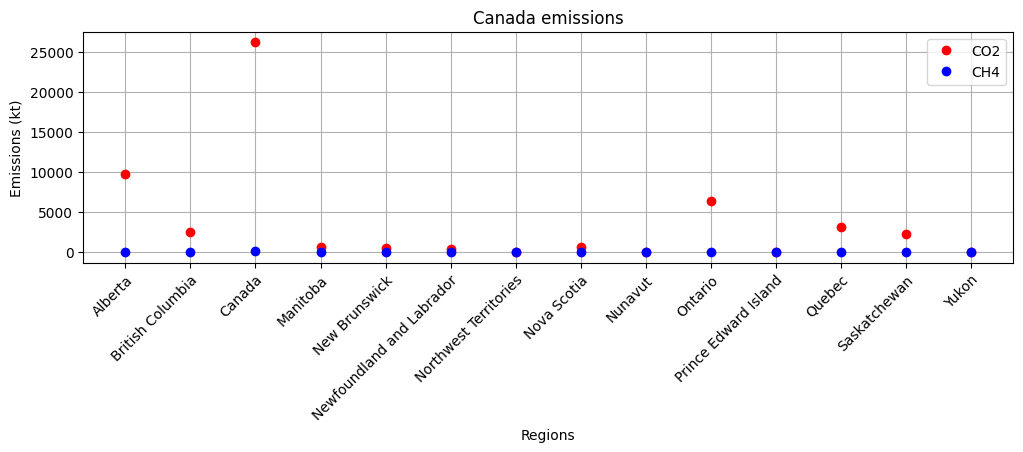

In [26]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.plot(Provinces_list,CO2_list,linestyle='none',
        marker='o', color='red', label='CO2')
ax.plot(Provinces_list,CH4_list,linestyle='none',
        marker='o', color='blue', label='CH4')

ax.set_title('Canada emissions')
ax.set_xlabel('Regions')
ax.set_ylabel('Emissions (kt)')
ax.grid()

ax.legend()

# plt.set_xticks(rotation=90, ha='center')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.savefig('CO2 emissions/Plot1'+'.pdf', bbox_inches='tight',)
plt.savefig('CO2 emissions/Plot1'+'.svg', bbox_inches='tight',)
plt.savefig('CO2 emissions/Plot1'+'.eps', bbox_inches='tight',)
plt.savefig('CO2 emissions/Plot1'+'.png', bbox_inches='tight', dpi=600)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

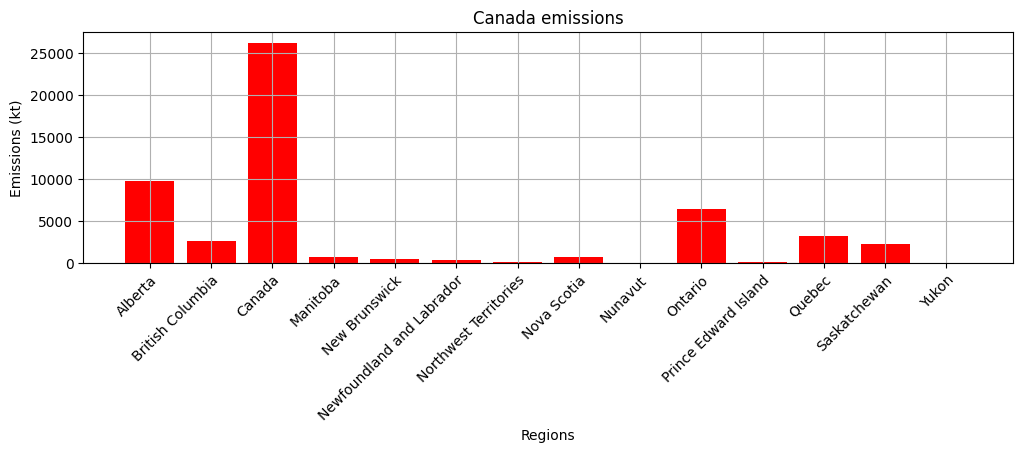

In [25]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.bar(CanadaEmissions_df_subset1.index,CanadaEmissions_df_subset1['CO2'], color='red')
ax.set_title('Canada emissions')
ax.set_xlabel('Regions')
ax.set_ylabel('Emissions (kt)')
ax.grid()

# plt.set_xticks(rotation=90, ha='center')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.savefig('CO2 emissions/Plot2'+'.pdf', bbox_inches='tight',)
plt.savefig('CO2 emissions/Plot2'+'.svg', bbox_inches='tight',)
plt.savefig('CO2 emissions/Plot2'+'.eps', bbox_inches='tight',)
plt.savefig('CO2 emissions/Plot2'+'.png', bbox_inches='tight', dpi=600)

In [ ]:
plt.savefig('CO2 emissions/Plot1'+'.pdf', bbox_inches='tight',)
plt.savefig('CO2 emissions/Plot1'+'.svg', bbox_inches='tight',)
plt.savefig('CO2 emissions/Plot1'+'.eps', bbox_inches='tight',)
plt.savefig('CO2 emissions/Plot1'+'.png', bbox_inches='tight', dpi=600)